> Игорь Сорочан DSU-31

# Домашнее задание `"Центральная предельная теорема и статистика"`

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

In [3]:
### YOUR CODE/SOLUTION HERE
supl_ = {"a":.2,"b":.3,"c":.5}
qual_ = {"a":.1,"b":.05,"c":.2}
prob = 0
for k,v in supl_.items():
    prob += v * qual_[k]
print(f"Prob = {prob:.01%}")

Prob = 13.5%


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [4]:
### YOUR SOLUTION HERE
# Independent events are those events whose occurrence is not dependent 
# on any other event. For example, if we flip a coin and get  the outcome as Head, 
# then again if we flip the coin but this time we get the outcome as Tail. 
# In both cases, the occurrence of both events is independent of each other.
# If A and B are two independent events, then
# P(A ∩ B) = P(B) * P(A)

n=100000
p1_2, p2_3, p3_1, p_all = (0,)*4
for i in range(n):
    # flip a coin
    e1 = np.random.randint(0,2)
    e2 = np.random.randint(0,2)
    e3 = np.random.randint(0,2)

    # outcomes
    # 1- event happend (both sides are the same), 
    # 0- event not happened (sides differ)
    p1_2 += (e1 == e2) 
    p2_3 += (e2 == e3)
    p3_1 += (e3 == e1)

    # all three events take place:
    p_all += (e1 == e2) * (e2 == e3) * (e3 == e1)

# analytical probability of pair independent events
p1_2an = ((e1 == e2) + (e1 != e2))/2 
print(f'Analytical probability of single event: {p1_2an}')
print(f'P(e1=1)= {p1_2/n}' )
print(f'P(e2=1)= {p2_3/n}' )
print(f'P(e3=1)= {p3_1/n}\n' )

print(f'Analytical probability in general: {p1_2an**3}')
print(f'Real P(e1/\\e2/\\e3)= {p_all/n}')

print("Analytical probability of all outcomes doesn't equal real probability.")
print("therefore events are not independent in general")

Analytical probability of single events: 0.5
P(e1=1)= 0.49908
P(e2=1)= 0.50103
P(e3=1)= 0.50115

Analytical probability in general: 0.125
Real P(e1/\e2/\e3)= 0.25063
Analytical probability of all outcomes doesn't equal real probability.
therefore events are not independent in general


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns


### `Normal distribution`

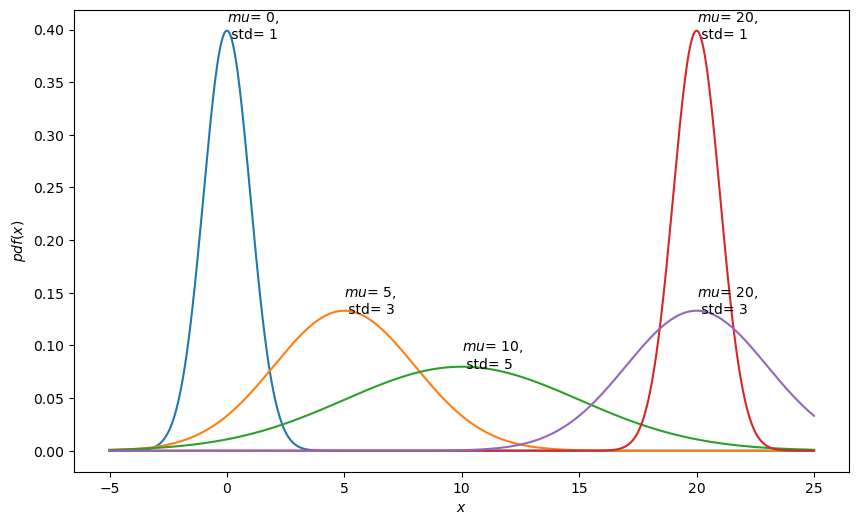

In [6]:
n1 = [(0,1),(5,3),(10,5), (20,1), (20,3)]
x = np.linspace(-5,25,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(n1)):

    rv = sts.norm(loc= n1[k][0], scale= n1[k][1])
    y= rv.pdf(x)
    sns.lineplot(x=x, y= y )  
    plt.text(x= n1[k][0], y=y.max()*.98, s= f'$mu$= {n1[k][0]},\n std= {n1[k][1]}')  

plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show() 

The smaller the standard deviation the greater is pdf(probability density function) maximum. 

### `Student distribution`

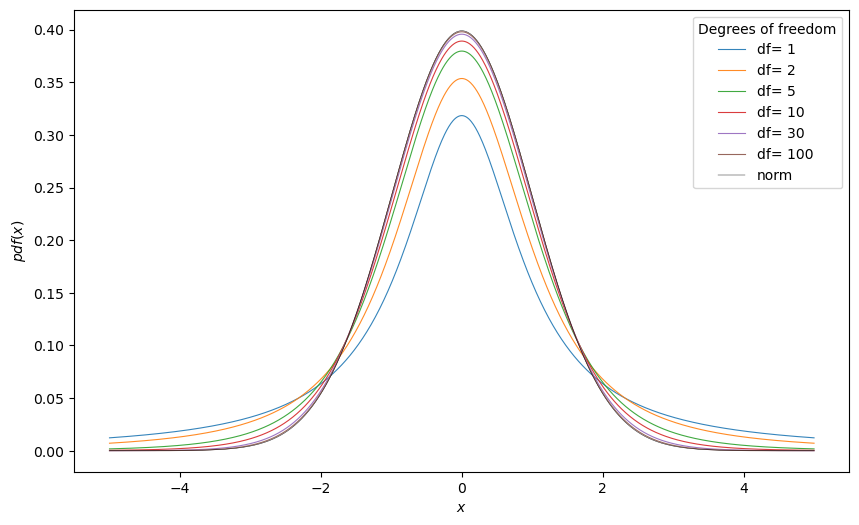

In [7]:
n1 = [(1,0),(2,0),(5,0),(10,0),(30,0),(100,0)]
x = np.linspace(-5,5,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(n1)):

    rv = sts.t(df= n1[k][0],loc=n1[k][1])
    y= rv.pdf(x)
    sns.lineplot(x=x, y= y, alpha=.9 , linewidth=.8, label= f'df= {n1[k][0]} ')  
    # plt.text(x= 0, y=y.max()*.99, s= f'$df$= {n1[k][0]}') 
    
sns.lineplot(x=x, y= sts.norm.pdf(x), linewidth=.3 , color= 'k',label="norm") 
plt.legend(title= "Degrees of freedom") 
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.show() 

For n greater than 30, the student's distribution becomes similar to the normal distribution

### `Exponential distribution`

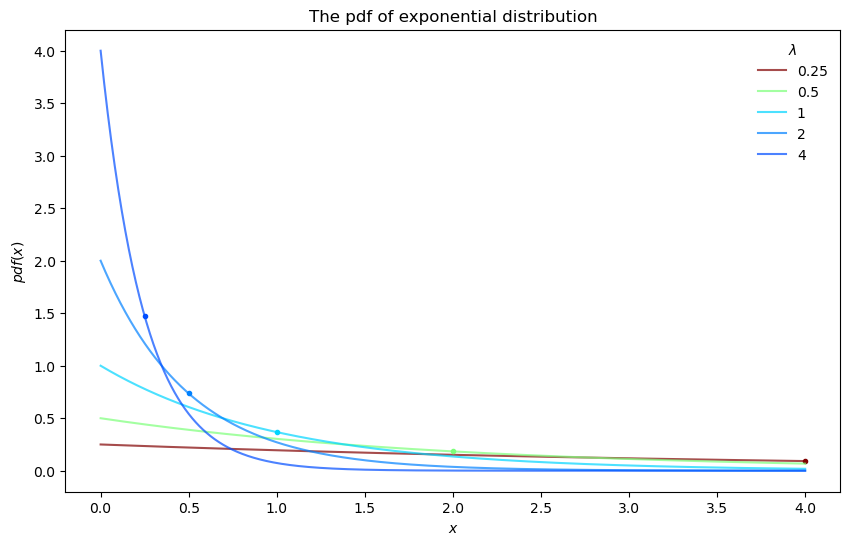

In [8]:
lambda_ = [(0.25,0),(0.5,0),(1,0),(2,0),(4,0)] # number of events per time unit(x)
x = np.linspace(0,4,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(lambda_)):

    rv = sts.expon(scale= 1/ lambda_[k][0])
    y= rv.pdf(x)
    sns.lineplot(x=x, y= y, alpha=.7, label= str(lambda_[k][0]), color= plt.cm.jet(1/(k+1)))  
    plt.plot(1/ lambda_[k][0],rv.pdf(1/ lambda_[k][0]), marker="o", markersize=3,color= plt.cm.jet(1/(k+1)) )
ax.legend(loc='best', frameon=False, title = "$\lambda$")
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$')
plt.title("The pdf of exponential distribution")
plt.show() 

Dots represents the means of distributions, e.g.  
if $\lambda=$ 2 then x = 0.5 (on average we observe 1 event in a half of time unit).

The exponential distribution graph is a graph of the probability density function which shows the distribution of distance or time taken between events.  
$\lambda$ represents the rate parameter, and it defines the mean number of events in an interval,  x represents the time.  
The mean of the exponential distribution is $\frac{1}{\lambda}$  
The key property of the exponential distribution is memoryless as the past has no impact on its future behaviour, and each instant is like the starting of the new random period.

The difference between the Poisson distribution and exponential distribution:  
Poisson distribution deals with the number of occurrences of events in a fixed period of time, whereas the exponential distribution is a continuous probability distribution that often concerns the amount of time until some specific event happens.

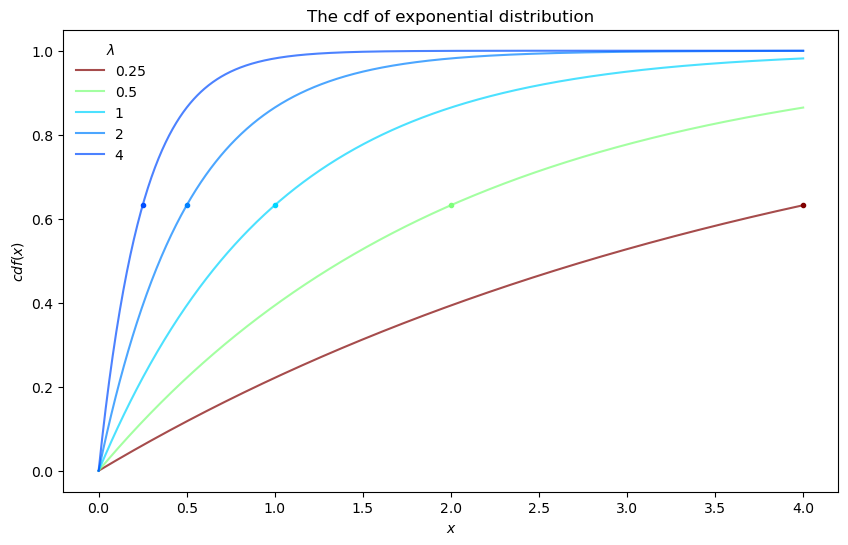

In [9]:
lambda_ = [(0.25,0),(0.5,0),(1,0),(2,0),(4,0)] # number of events per time unit(x)
x = np.linspace(0,4,1000)

fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(lambda_)):

    rv = sts.expon(scale= 1/ lambda_[k][0])
    y= rv.cdf(x)
    sns.lineplot(x=x, y= y, alpha=.7, label= str(lambda_[k][0]), color= plt.cm.jet(1/(k+1)))  
    plt.plot(1/ lambda_[k][0],rv.cdf(1/ lambda_[k][0]), marker="o", markersize=3,color= plt.cm.jet(1/(k+1)) )
ax.legend(loc='best', frameon=False, title = "$\lambda$")
plt.ylabel('$cdf(x)$')
plt.title("The cdf of exponential distribution")
plt.xlabel('$x$')
plt.show() 

Dots represents the means of distributions, e.g.  
if $\lambda=$ 2 then x = 0.5 (on average we observe 1 event in a half of time unit).